In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/penguins.csv',index_col = 0)
# data.set_index('Unnamed: 0',inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [4]:
data.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [5]:
# @title Default title text
data = data[data['species']!='Chinstrap']
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,47.2,13.7,214,4925,female,2009
261,Gentoo,Biscoe,46.8,14.3,215,4850,female,2009
262,Gentoo,Biscoe,50.4,15.7,222,5750,male,2009
263,Gentoo,Biscoe,45.2,14.8,212,5200,female,2009


In [6]:
data.iloc[ : , [2,3,4,5,7]].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.543166,0.870276,0.876786,0.063172
bill_depth_mm,-0.543166,1.000000,-0.634645,-0.483227,-0.033169
flipper_length_mm,0.870276,-0.634645,1.000000,0.884427,0.125260
body_mass_g,0.876786,-0.483227,0.884427,1.000000,0.005869
year,0.063172,-0.033169,0.125260,0.005869,1.000000


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

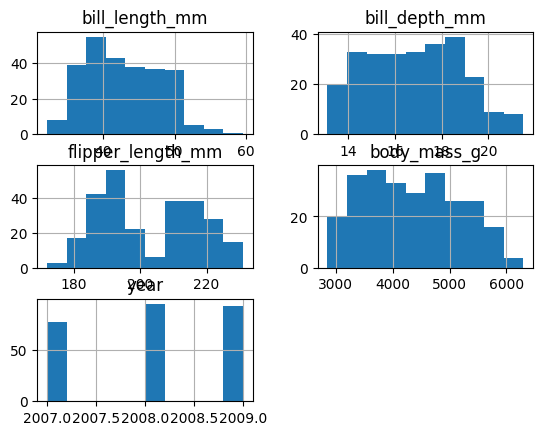

In [7]:
data.hist()

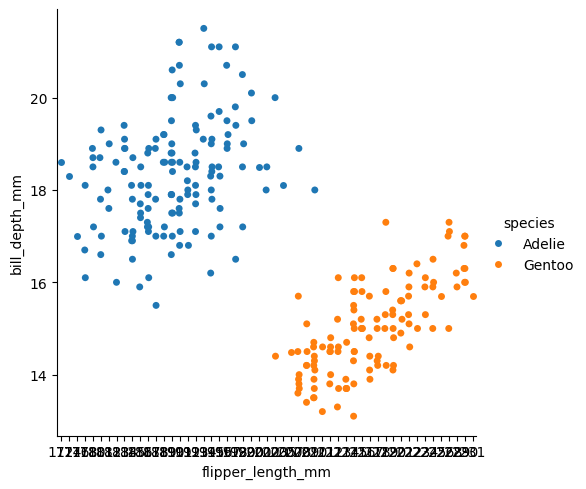

In [8]:
sns.catplot(data=data, x='flipper_length_mm', y='bill_depth_mm',hue='species')

In [9]:
X = data[['flipper_length_mm','bill_depth_mm']].to_numpy()
y_true = data['species'].map({'Adelie':0,'Gentoo':1}).to_numpy()
y_true = y_true.reshape((265,1))

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
def cost_function(y_true,y_pred ):
  return( -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred)))

In [11]:
def plot_graph():
  x_decision_boundary = np.linspace( np.min( X[:,0].reshape((265,1))), np.max(X[:,0].reshape((265,1))), 100 )
  # x_decision_boundary = np.linspace( 100,200 , 100 )
  y_decision_boundary = -(w[:,0] * x_decision_boundary + b) / w[:,1]
  sns.catplot(data=data, x='flipper_length_mm', y='bill_depth_mm',hue='species')
  plt.plot(x_decision_boundary,y_decision_boundary,color='cyan')

In [12]:
def gradient_descent(L,w,b,y_pred):

  dw = (1/X.shape[0] * np.dot(X.T , (y_pred-y_true) ))
  db = np.sum(y_pred-y_true)
  w -= dw * L
  b-= db * L
  return w,b


In [13]:
def species_prediction(X):
  pred = b + np.dot(X,w)
  y_pred = sigmoid(pred)
  y = sigmoid(y_pred)
  # if(y<=0.5):
  #   print('Adelie')
  # else:
  #   print('Gentoo')
  print(y)

In [16]:
epochs = 10000
b = 0
loss = []
w = np.zeros([X.shape[1],1])
loss = np.array([])
pred = b + np.dot(X,w)
y_pred = sigmoid(pred)
learning_rate = 0.0001
for i in range(epochs):
  w,b = gradient_descent(learning_rate,w,b,y_pred)
  value = (cost_function(y_true,y_pred))
  loss
  if((i+1)%1000==0):
    # plot_graph()
    plt.show()
    print(w,b)






[[-0.35924528]
 [-0.16869811]] -1.3499999999999788
[[-0.71849057]
 [-0.33739623]] -2.699999999999941
[[-1.07773585]
 [-0.50609434]] -4.04999999999992
[[-1.43698113]
 [-0.67479245]] -5.400000000000326
[[-1.79622642]
 [-0.84349057]] -6.750000000000733
[[-2.1554717 ]
 [-1.01218868]] -8.100000000001138
[[-2.51471698]
 [-1.18088679]] -9.450000000001545
[[-2.87396226]
 [-1.34958491]] -10.800000000001951
[[-3.23320755]
 [-1.51828302]] -12.150000000002358
[[-3.59245283]
 [-1.68698113]] -13.500000000002764


In [ ]:
  #  X[:,0].reshape((265,1))
# # y_true.shape
# X[:,0].reshape((265,1)).shape == y_true.shape

species_prediction([[0,1]])


[[0.50000006]]


In [ ]:
loss

array([], dtype=float64)